# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

# Load Data

In [2]:
car_data = pd.read_csv('../data/car_data_cleaned.csv')
car_data.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230
Engine Cylinders,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2
Vehicle Size,Compact,Compact,Compact,Compact,Compact


In [3]:
car_data.shape

(11199, 25)

In [4]:
X = pd.get_dummies(car_data)
X.head().T

,0,1,2,3,4
Year,2011.0,2011.0,2011.0,2011.0,2011.0
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Number of Doors,2.0,2.0,2.0,2.0,2.0
highway MPG,26.0,28.0,28.0,28.0,28.0
...,...,...,...,...,...
Vehicle Style_Passenger Minivan,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Passenger Van,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Regular Cab Pickup,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Sedan,0.0,0.0,0.0,0.0,0.0


# Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='MSRP'), 
                                                    X.MSRP, test_size=0.3, 
                                                    random_state=42)

In [6]:
X_train.shape, X_test.shape

((7839, 1018), (3360, 1018))

In [7]:
y_train.shape, y_test.shape

((7839,), (3360,))

In [8]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [9]:
#Repeat this check for the test split in `X_test`
X_test.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

# Linear Regression Model

In [10]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#MinMaxScaler(),
#and then Linear Regression
LR_pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    MinMaxScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [11]:
LR_pipe.fit(X_train, y_train)

/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f830304e670>)),
                ('linearregression', LinearRegression())])

In [12]:
y_tr_pred = LR_pipe.predict(X_train)
y_te_pred = LR_pipe.predict(X_test)
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8085503094203503, 0.8613317532641016)

In [13]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(12907.326367980284, 12719.998298474586)

In [14]:
#Assessing performance using cross-validation
cv_results = cross_validate(LR_pipe, X_train, y_train, cv=5)
cv_scores = cv_results['test_score']
cv_scores

/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


array([0.7793915 , 0.61888526, 0.60807406, 0.74149974, 0.60028478])

In [15]:
np.mean(cv_scores), np.std(cv_scores)

(0.6696270691802994, 0.07534688823064077)

In [16]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.52, 0.82])

## Hyperparameter search using GridSearchCV

In [17]:
k = [k for k in range(1,101)]
grid_params = {'selectkbest__k': k}
lr_grid_cv = GridSearchCV(LR_pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)

/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f830304e670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [18]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [19]:
lr_grid_cv.best_params_

{'selectkbest__k': 90}

In [20]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [21]:
#Display the features attributes the most to the best model
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False).head(20)

Vehicle Style_4dr Hatchback     6.599165e+14
Vehicle Style_2dr Hatchback     6.599165e+14
Model_Landaulet                 6.128374e+13
Model_62                        6.128374e+13
Model_57                        6.128374e+13
Model_Veyron 16.4               4.867367e+13
Model_Reventon                  1.230594e+06
Model_SLR McLaren               3.442554e+05
Model_Carrera GT                2.994598e+05
Model_Aventador                 1.882167e+05
Model_Phantom Drophead Coupe    1.804092e+05
Make_Rolls-Royce                1.710189e+05
Model_Phantom Coupe             1.422508e+05
Model_Phantom                   1.418286e+05
Make_Lamborghini                1.300234e+05
Model_612 Scaglietti            1.187056e+05
Model_599                       1.181898e+05
Model_Azure T                   1.158531e+05
Make_Bentley                    1.155839e+05
Engine HP                       1.009964e+05
dtype: float64

Looking at all the high ranking features, they are mostly related to luxury performance cars. These features affects the price the most, which make a lot of sense.

# Random Forest Model

In [22]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(max_depth=7, n_estimators=100, n_jobs=-1, random_state=47)
)

In [23]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [24]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.95811032, 0.9482372 , 0.75658278, 0.95604502, 0.76514972])

In [25]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.8768250077405024, 0.09477592090659313)

In [26]:
RF_pipe.fit(X_train, y_train)
y_tr_pred = RF_pipe.predict(X_train)
y_te_pred = RF_pipe.predict(X_test)
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9580845547397729, 0.9119881642452651)

In [27]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(5223.28447397409, 5712.452189306001)

## Hyperparameter search using GridSearchCV

In [28]:
n_est = [int(n) for n in np.logspace(start=1, stop=2.5, num=5)]
max_depths = np.linspace(6, 8, 3, endpoint=True)
grid_params = {
        'randomforestregressor__max_depth': max_depths,
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__max_depth': array([6., 7., 8.]),
 'randomforestregressor__n_estimators': [10, 23, 56, 133, 316],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [29]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [30]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(max_depth=7,
                                                              n_jobs=-1,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': array([6., 7., 8.]),
                         'randomforestregressor__n_estimators': [10, 23, 56,
                                                                 133, 316],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [31]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 8.0,
 'randomforestregressor__n_estimators': 316,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [32]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.9711989 , 0.95818684, 0.76073651, 0.9659741 , 0.77147557])

In [33]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.8855143833311789, 0.0976434915067946)

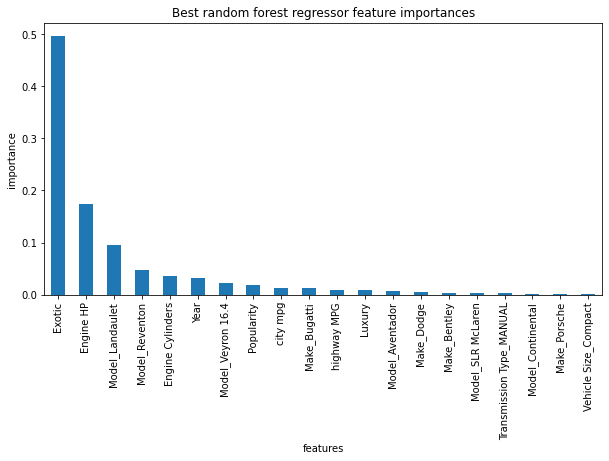

In [34]:
#Plot a barplot of the random forest's feature importances
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps[:20].plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

The dominant top two features are:

 - Exotic: Whether the car is imported or not highly affects the price. This makes sense.
 - Engine HP: Last time, we already identify that engine horse power has the highest correlation with MSRP. So no surprise it ranks high.
 <br><br>There are other categorical features related to luxury performanced car brands, which are similar to the linear regression model. Those features reflect the brand value toward the car price. 
 <br><br>The high ranking features for the random forest regression model are more intuitive. 

# Final Model Selection

## Linear regression model performance:

In [35]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [36]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(7622.419493432826, 527.7546184676135)

In [38]:
lr_mae_test = mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))
lr_mae_test

7507.474154476819

## Random forest regression model performance:

In [39]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [40]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(5133.233340741057, 440.684152658531)

In [41]:
rf_mae_test = mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))
rf_mae_test

5109.573369867482

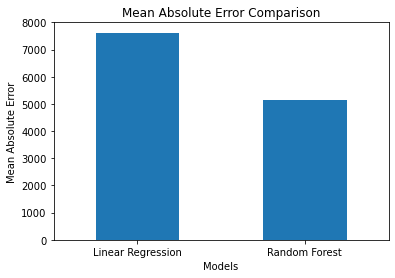

In [42]:
models_mae = pd.Series([lr_mae_mean, rf_mae_mean])
models_mae.index= ['Linear Regression', 'Random Forest']
models_mae.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison');

## Conclusion

The random forest model has a lower cross-validation mean absolute error. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

# Save best model

In [43]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [44]:
# save the model
modelpath = '../models'
save_file(best_model, 'car_pricing_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../models/car_pricing_model.pkl"


# Prediction Model without Brand and Model

It looks like the pricing model is highly related to the car brand and the model. However, when customers using this model, they probably would not have a ideal brand in mind. It would be good to have a seperate model that can give out a range of price for given car features without the brands and models.

In [45]:
X_mod = pd.get_dummies(car_data.drop(['Make','Model'], axis=1))

In [46]:
X_mod

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Crossover,Diesel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,2012,300.0,6.0,4.0,23,16,204,46120,1,0,...,0,0,0,0,0,0,0,0,0,0
11195,2012,300.0,6.0,4.0,23,16,204,56670,1,0,...,0,0,0,0,0,0,0,0,0,0
11196,2012,300.0,6.0,4.0,23,16,204,50620,1,0,...,0,0,0,0,0,0,0,0,0,0
11197,2013,300.0,6.0,4.0,23,16,204,50920,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_mod.drop(columns='MSRP'), 
                                                    X_mod.MSRP, test_size=0.3, 
                                                    random_state=42)

Let's carry over previous models, see how they perform.

# Linear Regression

In [48]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f830304e670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [49]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [50]:
lr_grid_cv.best_params_

{'selectkbest__k': 52}

In [51]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [52]:
#Display the features attributes the most to the best model
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False).head(10)

Engine HP                                       254492.378221
city mpg                                        192192.867230
Exotic                                          132632.955529
Engine Cylinders                                 69463.377263
Vehicle Style_Convertible SUV                    24101.128979
Engine Fuel Type_natural gas                     19217.172868
Number of Doors                                  19068.326789
Vehicle Style_Convertible                        17750.778939
Engine Fuel Type_premium unleaded (required)     13036.726155
Transmission Type_AUTOMATED_MANUAL               11351.161541
dtype: float64

This time, after removing features related to brands and models, the top most-effective features are much similar to the random forest model.

# Random Forest Model

In [53]:
#Use Grid search for hyperparameter tuning
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(max_depth=7,
                                                              n_jobs=-1,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': array([6., 7., 8.]),
                         'randomforestregressor__n_estimators': [10, 23, 56,
                                                                 133, 316],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [54]:
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 8.0,
 'randomforestregressor__n_estimators': 316,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

In [55]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.96915957, 0.95104428, 0.88600464, 0.94965601, 0.70253187])

In [56]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.8916792715345829, 0.09868904903499326)

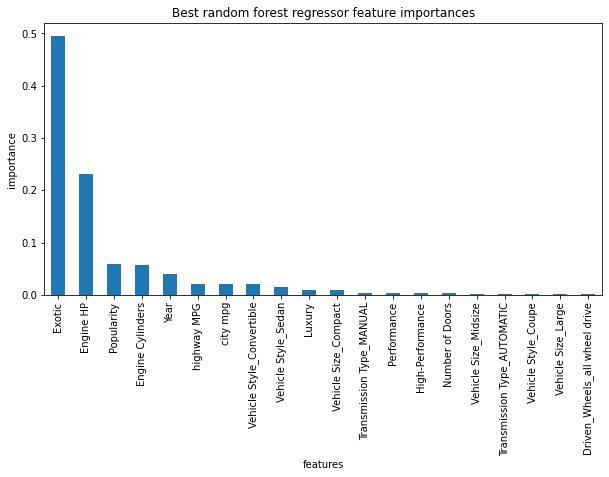

In [57]:
#Plot a barplot of the random forest's feature importances
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps[:20].plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

It is good that after removing the models and brand information, the dominant features didn't change too much for the random forest model.

# Final Model Selection

## Linear regression model performance:

In [58]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [59]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(13615.531033992453, 437.47299770910735)

In [60]:
rf_mae_test = mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))
rf_mae_test

13489.573294303296

## Random forest regression model performance:

In [61]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [62]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(5248.658832237958, 566.0944499871346)

In [63]:
rf_mae_test = mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))
rf_mae_test

4948.214270421295

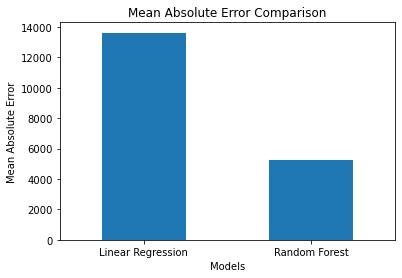

In [64]:
models_mae = pd.Series([lr_mae_mean, rf_mae_mean])
models_mae.index= ['Linear Regression', 'Random Forest']
models_mae.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison');

The random forest model still performs better than the linear regression model. The best parameters turn out to be exactly the same. The mean absolute error for the random forest regression model is pretty much the same as the previous model. Therefore, we can use the same model to predict the price without giving the model name and brand.

# Summary

There are two types of model being used. The fisrt model I tried is a linear regression model. The most useful features for the linear regression models are mostly related to brands that make luxury cars or models of luxury cars. In the EDA analysis, we already see that luxury performance cars have extremely high MSRP compared other cars in the market. So features related to luxury performance cars affect the car price the most. The performance from cross-validation shows the variability of mean square error is in a reasonable range. 
<br><br>
The random forest regression model has a very high accuracy fitting the train data. The variability after the cross-validation is also less compared to the linear regression model. It was found that imputing with the median, and using 316 estimators perform the best and scaling does not imporve the performance. A limitation of tree depth was given to avoid overfitting the training data. The dominant top two features for the random forest regression model is Exotic and Engine HP. Both models rank features for luxury performance car really high. 
<br><br>
The random forest model wins because it has a lower cross-validation mean absolute error by almost 2500 dollors. It also exhibits less variability. The performance on the test set is also very close to the cross-validation performance results. 
<br><br>
The original dataset has a lot of categorical data. Therefore, there are over a thousand features to feed the model. It would be worthwhile to investigate removing the least useful features. 
<br><br>
The second part of this notebook, the model and brand information were removed. The number of features reduced from 1018 to 56. The performance of the linear regression model got much worst, while the random forest model was still as good as before. It further proof that random forest model works great for this car dataset.